In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("bank-full.csv", sep=";")


In [11]:
# Statistik deskriptif hanya untuk kolom numerik
stats = df.describe().T  # sudah ada count, mean, std, min, 25%, 50%, 75%, max
stats.rename(columns={'25%':'Q1','50%':'Q2','75%':'Q3'}, inplace=True)
print(stats[['mean','std','min','Q1','Q2','Q3','max']])

                 mean          std     min     Q1     Q2      Q3       max
age         40.936210    10.618762    18.0   33.0   39.0    48.0      95.0
balance   1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0  102127.0
day         15.806419     8.322476     1.0    8.0   16.0    21.0      31.0
duration   258.163080   257.527812     0.0  103.0  180.0   319.0    4918.0
campaign     2.763841     3.098021     1.0    1.0    2.0     3.0      63.0
pdays       40.197828   100.128746    -1.0   -1.0   -1.0    -1.0     871.0
previous     0.580323     2.303441     0.0    0.0    0.0     0.0     275.0


In [12]:
print(df.select_dtypes(include=np.number).head(10))

   age  balance  day  duration  campaign  pdays  previous
0   58     2143    5       261         1     -1         0
1   44       29    5       151         1     -1         0
2   33        2    5        76         1     -1         0
3   47     1506    5        92         1     -1         0
4   33        1    5       198         1     -1         0
5   35      231    5       139         1     -1         0
6   28      447    5       217         1     -1         0
7   42        2    5       380         1     -1         0
8   58      121    5        50         1     -1         0
9   43      593    5        55         1     -1         0


In [13]:
print("Jumlah record:", df.shape[0])
print("Jumlah atribut:", df.shape[1])
print("Nama atribut:", df.columns.tolist())
print("Jumlah atribut numerik:", df.select_dtypes(include=np.number).shape[1])

Jumlah record: 45211
Jumlah atribut: 17
Nama atribut: ['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'y']
Jumlah atribut numerik: 7


In [14]:
for col in df.select_dtypes(include='object').columns:
    print(f"{col} -> {df[col].nunique()} label unik")
    print(df[col].value_counts())
    print()

job -> 12 label unik
job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64

marital -> 3 label unik
marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64

education -> 4 label unik
education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

default -> 2 label unik
default
no     44396
yes      815
Name: count, dtype: int64

housing -> 2 label unik
housing
yes    25130
no     20081
Name: count, dtype: int64

loan -> 2 label unik
loan
no     37967
yes     7244
Name: count, dtype: int64

contact -> 3 label unik
contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

month -> 12 label unik
month
may    13766
jul     6895
aug     6247

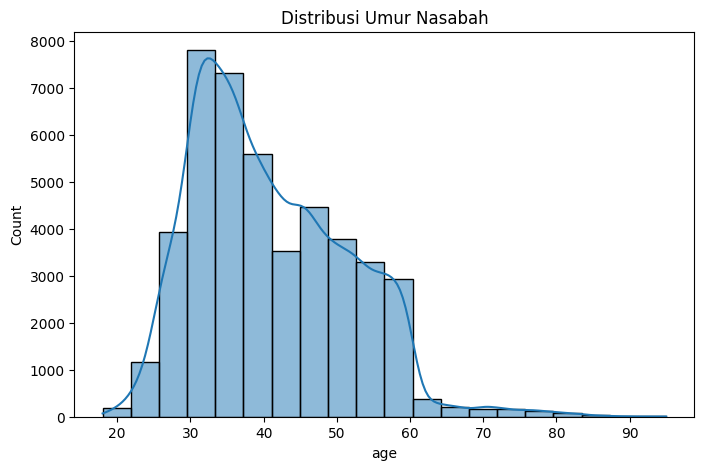

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['age'], bins=20, kde=True)
plt.title("Distribusi Umur Nasabah")
plt.show()

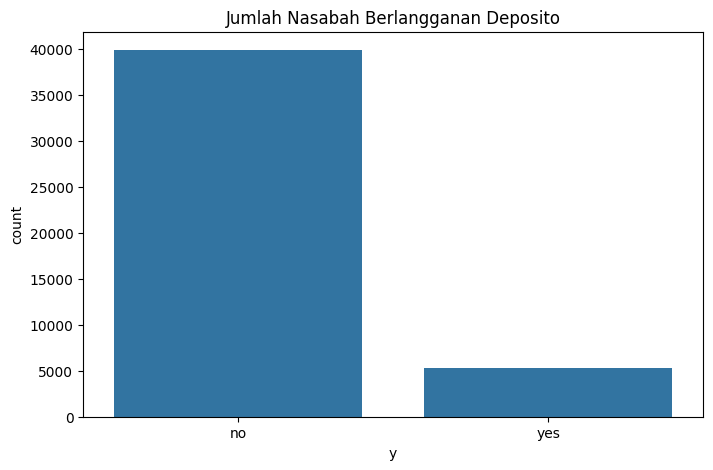

In [15]:
plt.figure(figsize=(8,5))
sns.countplot(x="y", data=df)
plt.title("Jumlah Nasabah Berlangganan Deposito")
plt.show()

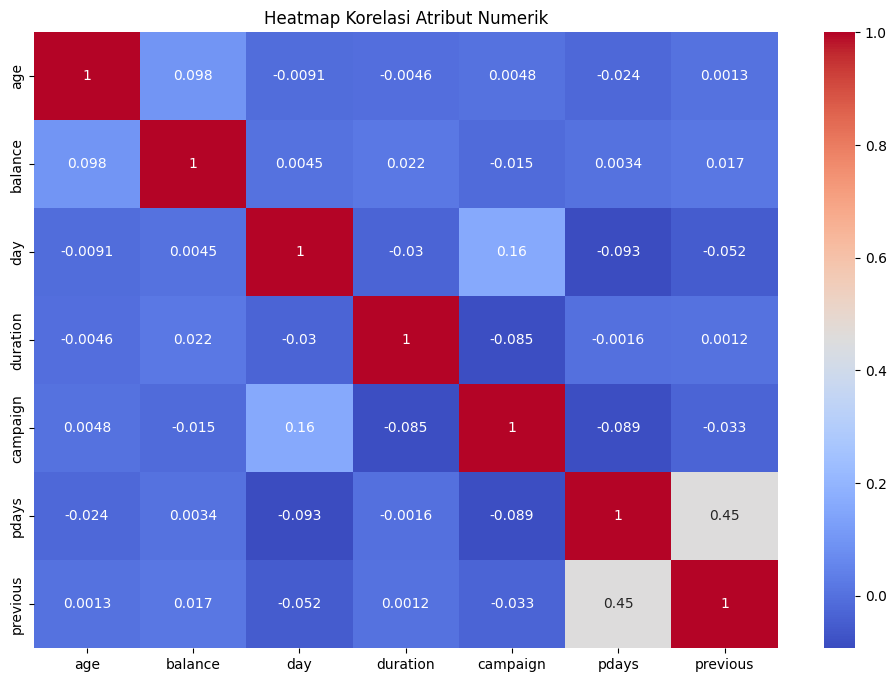

In [19]:
plt.figure(figsize=(12,8))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm')
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

# Kesimpulan Analisis Dataset Bank Marketing

1. Karakteristik dataset
   Dataset memiliki 45.211 record dan 17 atribut, dengan 7 atribut numerik (age, balance, day, duration, campaign, pdays, previous) dan 10 atribut kategorikal (job, marital, education, default, housing, loan, contact, month, poutcome, y).
Nilai rata-rata umur nasabah adalah 41 tahun, dengan distribusi terbanyak pada rentang 30–50 tahun.
Rata-rata saldo (balance) adalah 1.362, tetapi terdapat banyak outlier dengan saldo hingga lebih dari 100 ribu.
Durasi panggilan rata-rata adalah 258 detik, namun ada panggilan yang sangat panjang (hingga 4.918 detik).

2. Distribusi kategori
   Atribut job terdiri dari 12 kategori, dengan nasabah paling banyak bekerja di sektor blue-collar dan management.
Status pernikahan didominasi oleh married (27 ribu orang).
Pendidikan terbanyak adalah secondary (23 ribu orang).
Hanya sebagian kecil nasabah yang memiliki kredit bermasalah (default = yes hanya 815 orang).
Proporsi nasabah yang setuju berlangganan deposito (y = yes) adalah 5.289 (11,7%), jauh lebih sedikit dibanding yang menolak (no = 39.922).

3. Visualisasi data
    Histogram umur menunjukkan distribusi normal dengan puncak di usia produktif (30–40 tahun).
Grafik countplot pada label y memperlihatkan ketidakseimbangan kelas (class imbalance) antara yes dan no.
Heatmap korelasi menunjukkan bahwa durasi panggilan (duration) memiliki hubungan yang relatif lebih kuat dengan variabel target dibanding atribut numerik lainnya.
